# Proyek Analisis Data: E-Commerce Public Dataset

Nama : Hendro Setiawan

Email : hendrosetwn@gmail.com

Id Dicoding : hendrosetwn1995 

# Menentukan Pertanyaan Bisnis

Pertanyaan 1

Produk category apa yang mendapatkan rating review terbanyak dan tersedikit?

Pertanyaan 2

Bagaimana tren penjualan bulanan selama tahun 2017? Apakah ada bulan-bulan tertentu yang menunjukkan peningkatan atau penurunan signifikan dalam jumlah pesanan?

# Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

# Gathering Data

In [2]:
orders_df = pd.read_csv('./data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [3]:
order_items_df = pd.read_csv("./data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [4]:
order_reviews_df = pd.read_csv('./data/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [5]:
products_df = pd.read_csv('./data/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [6]:
product_category_name_df = pd.read_csv('./data/product_category_name_translation.csv')
product_category_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


# Assessing Data

In [7]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [8]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [9]:
print("Jumlah duplikasi :", orders_df.duplicated().sum())

Jumlah duplikasi : 0


In [10]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [11]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [12]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [13]:
print("Jumlah duplikasi :", order_items_df.duplicated().sum())

Jumlah duplikasi : 0


In [14]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [15]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [16]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [17]:
print("Jumlah duplikasi :", order_reviews_df.duplicated().sum())

Jumlah duplikasi : 0


In [18]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [19]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [20]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [21]:
print("Jumlah duplikasi :", products_df.duplicated().sum())

Jumlah duplikasi : 0


In [22]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [23]:
product_category_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [24]:
product_category_name_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [25]:
print("Jumlah duplikasi :", product_category_name_df.duplicated().sum())

Jumlah duplikasi : 0


In [26]:
product_category_name_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


# Cleaning Data

In [27]:
datetime_columns_orders = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns_orders:
    orders_df[column] = pd.to_datetime(orders_df[column], format="%Y-%m-%d %H:%M:%S")

In [28]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [29]:
order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"], format="%Y-%m-%d %H:%M:%S")

In [30]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [31]:
products_column_numeric = ["product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]
products_column_categorical = ["product_category_name", "product_name_lenght", "product_description_lenght", "product_photos_qty"]

for column in products_column_numeric:
    mean_value = products_df[column].mean()
    products_df[column].fillna(mean_value, inplace=True)

for column in products_column_categorical:
    most_common_category = products_df[column].mode().iloc[0]
    products_df[column].fillna(most_common_category, inplace=True)

In [32]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

# Exploratory Data Analysis (EDA)

EDA 1

In [33]:
merge_order_items_and_reviews_df = pd.merge(
    left = order_items_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

merge_order_items_and_reviews_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113309,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,9185f849f32d82e216a4e025e0c50f5c,5.0,NaN,NaN,2018-05-11 00:00:00,2018-05-14 12:53:47
113310,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,be803f6a93d64719fd685c1cc610918a,5.0,NaN,NaN,2018-07-24 00:00:00,2018-07-25 09:25:29
113311,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,dbdd81cd59a1a9f94a10a990b4d48dce,5.0,NaN,NaN,2017-10-29 00:00:00,2017-10-29 21:33:52
113312,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,fba117c9ac40d41ca7be54741f471303,5.0,NaN,Recebi o produto antes do prazo e corretamente.,2017-08-17 00:00:00,2017-08-18 12:24:05


In [34]:
merge_products_and_category_name_df = pd.merge(
    left=product_category_name_df,
    right=products_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

merge_products_and_category_name_df

,product_category_name,product_category_name_english,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,beleza_saude,health_beauty,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,75.0,21.0,7.0,13.0
1,beleza_saude,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0
2,beleza_saude,health_beauty,36555a2f528d7b2a255c504191445d39,51.0,1069.0,1.0,1467.0,23.0,16.0,20.0
3,beleza_saude,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,40.0,1469.0,3.0,1050.0,18.0,21.0,27.0
4,beleza_saude,health_beauty,75b4372e69a42f8ae1d908c076f547b2,22.0,1313.0,1.0,938.0,29.0,22.0,23.0
...,...,...,...,...,...,...,...,...,...,...
32933,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,2b18330ce86ae5c606250b75b499f370,42.0,277.0,3.0,120.0,19.0,11.0,15.0
32934,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,28ac6af4008a402e5039f3e042a36e13,48.0,488.0,5.0,500.0,36.0,10.0,26.0
32935,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,57bdf3098169cccdb62221bd3e089cbd,38.0,168.0,1.0,100.0,16.0,16.0,16.0
32936,seguros_e_servicos,security_and_services,8db75af9aed3315374db44d7860e25da,48.0,461.0,4.0,400.0,26.0,22.0,11.0


In [35]:
merge_products_and_category_name_df.isna().sum()

product_category_name            0
product_category_name_english    0
product_id                       0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
dtype: int64

In [36]:

merge_products_df = pd.merge(
    left=merge_products_and_category_name_df,
    right=merge_order_items_and_reviews_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

merge_products_df["product_category_name_english"] = merge_products_df["product_category_name_english"].str.replace('_', ' ')
merge_products_df

,product_category_name,product_category_name_english,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,...,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,beleza_saude,health beauty,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,75.0,21.0,7.0,13.0,...,94144541854e298c2d976cb893b81343,2017-05-18 11:05:13,29.90,15.79,e40a00338817a7127bfbf45220c30e8c,4.0,NaN,NaN,2017-05-20 00:00:00,2017-05-21 11:38:19
1,beleza_saude,health beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,...,abcd2cb37d46c2c8fb1bf071c859fc5b,2018-03-12 18:30:16,95.90,27.22,77bb6629f429afe0121776a1bba4f65f,5.0,NaN,NaN,2018-03-15 00:00:00,2018-03-16 03:26:29
2,beleza_saude,health beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,...,abcd2cb37d46c2c8fb1bf071c859fc5b,2017-08-04 19:03:15,89.90,38.18,f3d50350bb91071856a1aa302d58c32d,4.0,NaN,NaN,2017-08-11 00:00:00,2017-08-15 11:41:14
3,beleza_saude,health beauty,36555a2f528d7b2a255c504191445d39,51.0,1069.0,1.0,1467.0,23.0,16.0,20.0,...,851773c885feb5e2da3b4f82bc2b17ce,2018-02-14 14:31:45,29.90,16.11,b5425a02e3804ec8cb2ef00f95cc501c,5.0,NaN,NaN,2018-02-22 00:00:00,2018-04-28 21:25:23
4,beleza_saude,health beauty,e586ebb6022265ae1eea38f46ffe3ead,40.0,1469.0,3.0,1050.0,18.0,21.0,27.0,...,01fdefa7697d26ad920e9e0346d4bd1b,2018-08-14 13:35:14,64.90,19.64,d922c55fb82c5a62ceb8964747620fa5,5.0,NaN,NaN,2018-08-22 00:00:00,2018-08-25 03:35:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113285,fashion_roupa_infanto_juvenil,fashion childrens clothes,57bdf3098169cccdb62221bd3e089cbd,38.0,168.0,1.0,100.0,16.0,16.0,16.0,...,d98eec89afa3380e14463da2aabaea72,2017-10-16 01:17:50,39.99,14.10,549f0948d29acee5033f72e52f07dc8e,5.0,NaN,NaN,2017-10-17 00:00:00,2017-10-21 01:21:12
113286,fashion_roupa_infanto_juvenil,fashion childrens clothes,57bdf3098169cccdb62221bd3e089cbd,38.0,168.0,1.0,100.0,16.0,16.0,16.0,...,d98eec89afa3380e14463da2aabaea72,2018-03-13 17:55:36,39.99,10.15,048757148581cbd2c92bc96ca5d73211,5.0,NaN,NaN,2018-03-16 00:00:00,2018-03-19 09:12:20
113287,fashion_roupa_infanto_juvenil,fashion childrens clothes,57bdf3098169cccdb62221bd3e089cbd,38.0,168.0,1.0,100.0,16.0,16.0,16.0,...,d98eec89afa3380e14463da2aabaea72,2018-03-28 03:09:01,39.99,6.43,c4481ef5d41037c21d1b4a14d4eab656,5.0,NaN,NaN,2018-03-28 00:00:00,2018-03-29 11:16:27
113288,seguros_e_servicos,security and services,8db75af9aed3315374db44d7860e25da,48.0,461.0,4.0,400.0,26.0,22.0,11.0,...,4e922959ae960d389249c378d1c939f5,2017-09-26 04:05:52,100.00,15.45,1067a7f22781153115958799dc72a8df,1.0,NaN,"boa tarde produto enviado errado, terei que me...",2017-09-29 00:00:00,2017-09-30 20:49:37


In [37]:

group_products_df = merge_products_df.groupby(by=["product_category_name_english", "product_category_name"]).agg({
    "product_id": "first",
    "review_score": ["sum", "count", "mean"],
})
group_products_df["percentage"] = (group_products_df[("review_score", "sum")] / group_products_df[("review_score", "sum")].sum() * 100).round(3)

In [38]:

most_products = group_products_df.sort_values(by=("review_score", "sum"), ascending=False).head(5)
most_products

product_id  \
                                                                                 first   
product_category_name_english product_category_name                                      
bed bath table                cama_mesa_banho         14aa47b7fe5c25522b47b4b29c98dcb9   
health beauty                 beleza_saude            e3e020af31d4d89d2602272b315c3f6e   
sports leisure                esporte_lazer           96bd76ec8810374ed1b65e291975717f   
furniture decor               moveis_decoracao        2548af3e6e77a690cf3eb6368e9ab61e   
computers accessories         informatica_acessorios  a1b71017a84f92fd8da4aeefba108a24   

                                                     review_score         \
                                                              sum  count   
product_category_name_english product_category_name                        
bed bath table                cama_mesa_banho             49524.0  12735   
health beauty                 beleza_saude                39957.0   9645   
sports leisure                esporte_lazer               35493.0   8640   
furniture decor               moveis_decoracao            32520.0   8331   
computers accessories         informatica_acessorios      30853.0   7849   

                                                               percentage  
                                                          mean             
product_category_name_english product_category_name                        
bed bath table                cama_mesa_banho         3.888810     10.931  
health beauty                 beleza_saude            4.142768      8.819  
sports leisure                esporte_lazer           4.107986      7.834  
furniture decor               moveis_decoracao        3.903493      7.178  
computers accessories         informatica_acessorios  3.930819      6.810

In [39]:
fewest_products = group_products_df.sort_values(by=("review_score", "sum"), ascending=True).head(5)
fewest_products

product_id  \
                                                                                        first   
product_category_name_english product_category_name                                             
security and services         seguros_e_servicos             8db75af9aed3315374db44d7860e25da   
fashion childrens clothes     fashion_roupa_infanto_juvenil  8cfc3506cedc0626364457d254429118   
la cuisine                    la_cuisine                     b52e7c92200ed9874e77bc09b5ed4d40   
cds dvds musicals             cds_dvds_musicais              1dceebcc5f23c02ea23e16d5bedca000   
home comfort 2                casa_conforto_2                4fb3bad6b502eaca3b6d7d87bc1613a4   

                                                            review_score  \
                                                                     sum   
product_category_name_english product_category_name                        
security and services         seguros_e_servicos                     5.0   
fashion childrens clothes     fashion_roupa_infanto_juvenil         36.0   
la cuisine                    la_cuisine                            52.0   
cds dvds musicals             cds_dvds_musicais                     65.0   
home comfort 2                casa_conforto_2                       98.0   

                                                                             \
                                                            count      mean   
product_category_name_english product_category_name                           
security and services         seguros_e_servicos                2  2.500000   
fashion childrens clothes     fashion_roupa_infanto_juvenil     8  4.500000   
la cuisine                    la_cuisine                       13  4.000000   
cds dvds musicals             cds_dvds_musicais                14  4.642857   
home comfort 2                casa_conforto_2                  27  3.629630   

                                                            percentage  
                                                                        
product_category_name_english product_category_name                     
security and services         seguros_e_servicos                 0.001  
fashion childrens clothes     fashion_roupa_infanto_juvenil      0.008  
la cuisine                    la_cuisine                         0.011  
cds dvds musicals             cds_dvds_musicais                  0.014  
home comfort 2                casa_conforto_2                    0.022

EDA 2

In [40]:
orders_df["order_purchase_date"] = orders_df["order_purchase_timestamp"].dt.to_period("M")
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,2017-03
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2018-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017-08
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018-01


In [41]:
delivered_orders = orders_df[orders_df['order_status'] == 'delivered']
delivered_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,2017-03
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2018-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017-08
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018-01


In [42]:
grouped_data = delivered_orders.groupby(by="order_purchase_date").agg({
    "order_purchase_date": ["first", "count"]
})
grouped_data['monthly_value'] = grouped_data[('order_purchase_date', "first")].dt.strftime('%B')

grouped_data

order_purchase_date       monthly_value
                                  first count              
order_purchase_date                                        
2016-09                         2016-09     1     September
2016-10                         2016-10   265       October
2016-12                         2016-12     1      December
2017-01                         2017-01   750       January
2017-02                         2017-02  1653      February
2017-03                         2017-03  2546         March
2017-04                         2017-04  2303         April
2017-05                         2017-05  3546           May
2017-06                         2017-06  3135          June
2017-07                         2017-07  3872          July
2017-08                         2017-08  4193        August
2017-09                         2017-09  4150     September
2017-10                         2017-10  4478       October
2017-11                         2017-11  7289      November
2017-12                         2017-12  5513      December
2018-01                         2018-01  7069       January
2018-02                         2018-02  6555      February
2018-03                         2018-03  7003         March
2018-04                         2018-04  6798         April
2018-05                         2018-05  6749           May
2018-06                         2018-06  6099          June
2018-07                         2018-07  6159          July
2018-08                         2018-08  6351        August

In [43]:
grouped_data_2017 = grouped_data.loc[grouped_data.index.year == 2017]
grouped_data_2017

order_purchase_date       monthly_value
                                  first count              
order_purchase_date                                        
2017-01                         2017-01   750       January
2017-02                         2017-02  1653      February
2017-03                         2017-03  2546         March
2017-04                         2017-04  2303         April
2017-05                         2017-05  3546           May
2017-06                         2017-06  3135          June
2017-07                         2017-07  3872          July
2017-08                         2017-08  4193        August
2017-09                         2017-09  4150     September
2017-10                         2017-10  4478       October
2017-11                         2017-11  7289      November
2017-12                         2017-12  5513      December

# Visualization & Explanatory Analysis

Pertanyaan 1

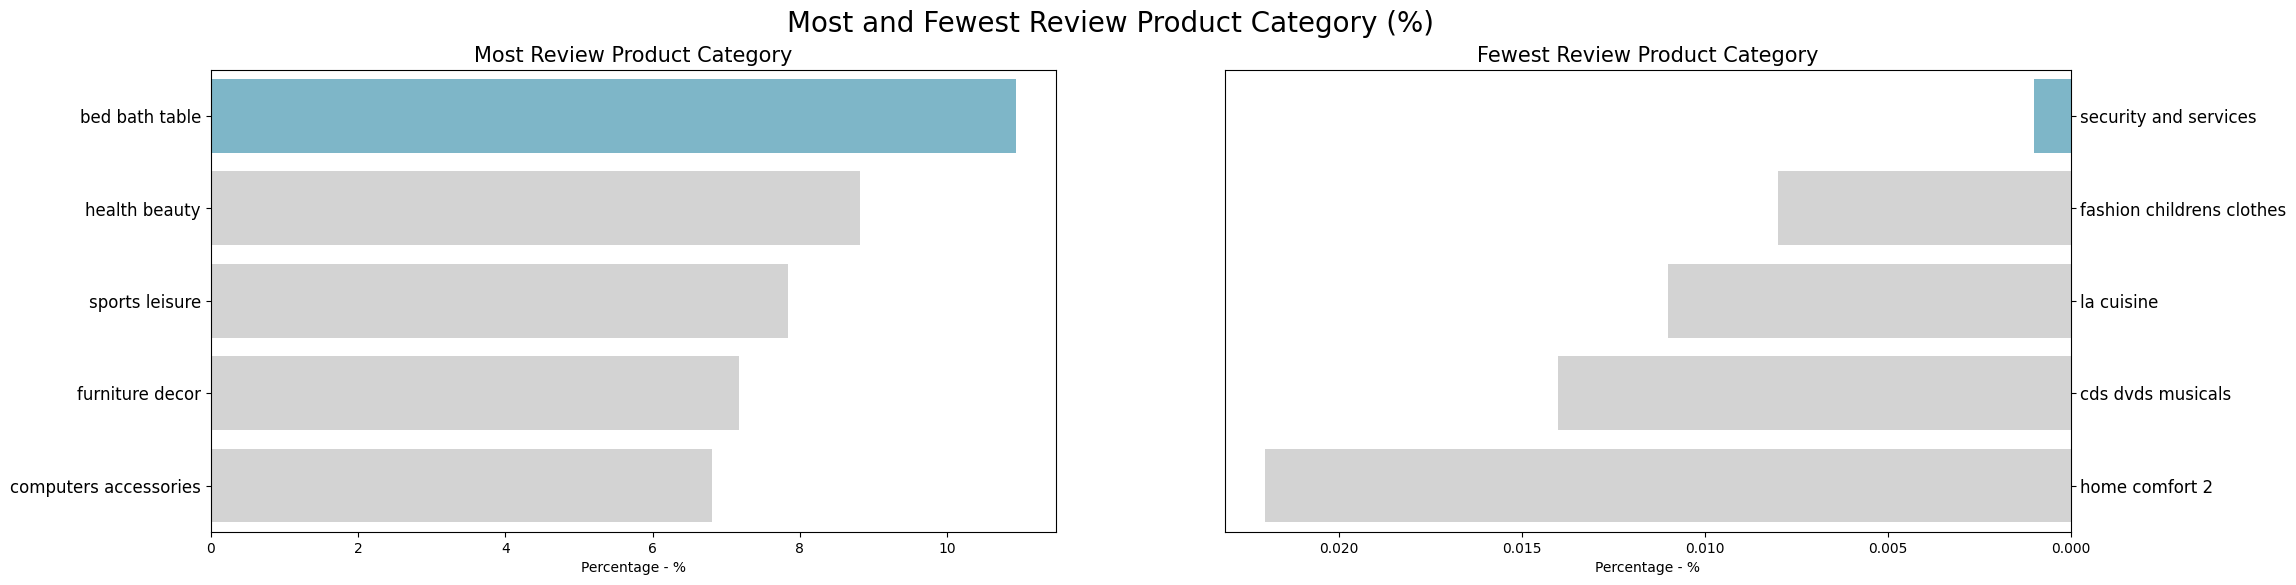

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="percentage", y="product_category_name_english", hue="product_category_name_english", data=most_products, palette=colors, ax=ax[0], legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel("Percentage - %")
ax[0].set_title("Most Review Product Category", loc="center", fontsize=15)
ax[0].tick_params(axis="y", labelsize=12)

sns.barplot(x="percentage", y="product_category_name_english", hue="product_category_name_english", data=fewest_products, palette=colors, ax=ax[1], legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel("Percentage - %")
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Fewest Review Product Category", loc="center", fontsize=15)
ax[1].tick_params(axis="y", labelsize=12)

plt.suptitle("Most and Fewest Review Product Category (%)", fontsize=20)
plt.show()

Pertanyaan 2

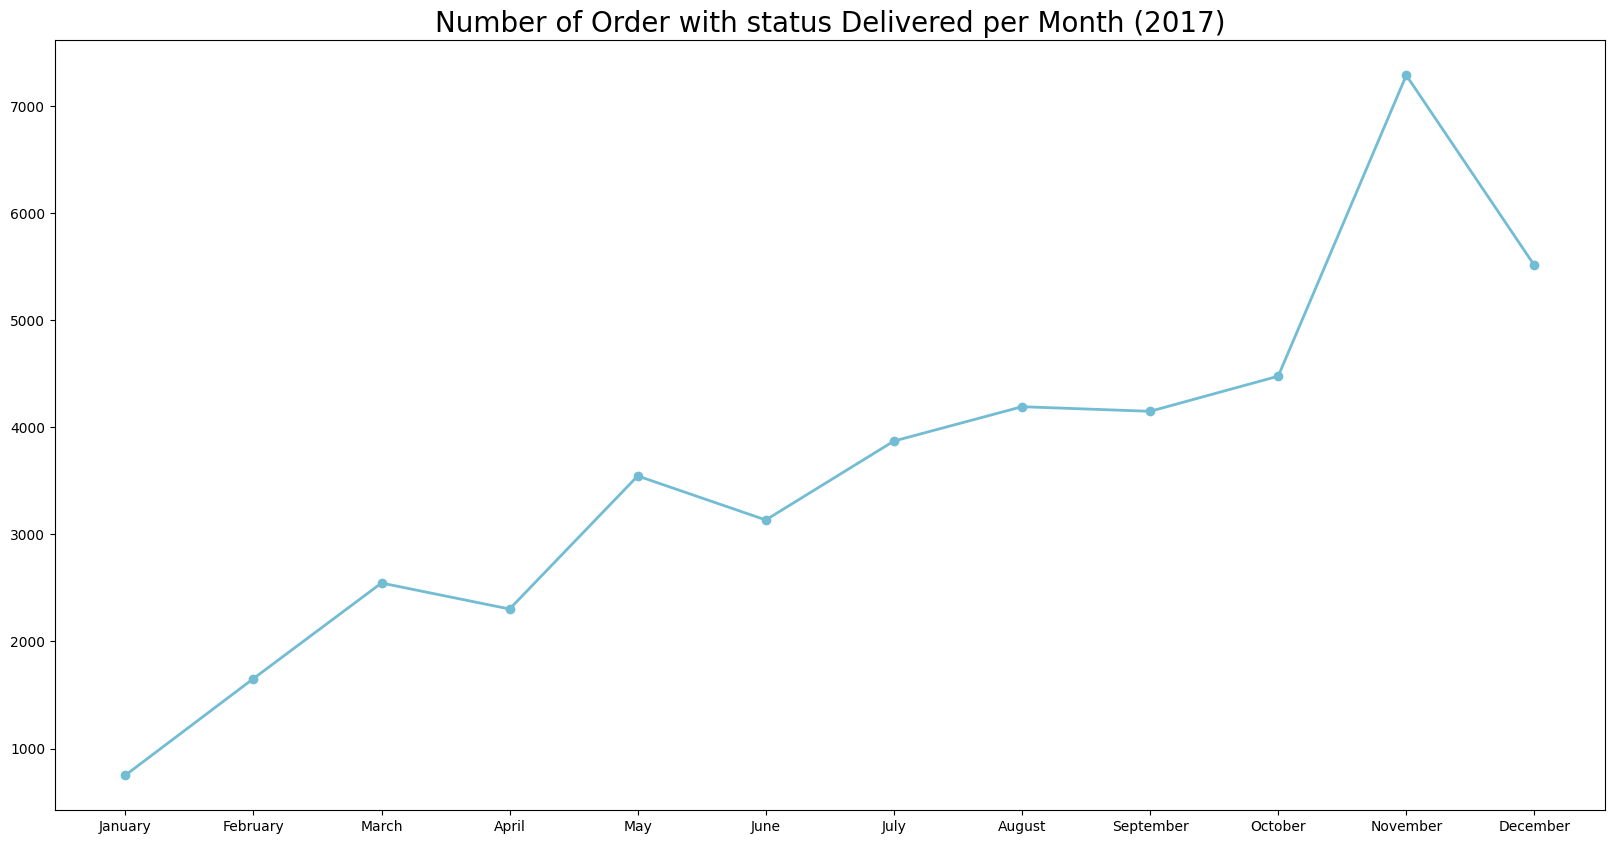

In [47]:
plt.figure(figsize=(20, 10))
plt.plot(grouped_data_2017["monthly_value"], grouped_data_2017[("order_purchase_date", "count")], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Order with status Delivered per Month (2017)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Conclusion

Pertanyaan 1
Produk category apa yang mendapatkan rating review terbanyak dan tersedikit?

Produk category yang mendapatkan rating terbanyak adalah bed bat table dengan angka 10.93% dan yang tersedikit adalah security and services dengan angka 0.001% dari total keseluruhan rating review.

Pertanyaan 2
Bagaimana tren penjualan bulanan selama tahun 2017? Apakah ada bulan-bulan tertentu yang menunjukkan peningkatan atau penurunan signifikan dalam jumlah pesanan?

Jumlah pesanan menunjukkan peningkatan yang konsisten dari bulan Januari hingga November, mencapai puncak tertinggi pada bulan November. Namun meskipun terjadi peningkatan sepanjang tahun, terdapat penurunan signifikan pada bulan Desember.

In [ ]:
main_data_df = pd.merge(
    left=orders_df,
    right=merge_products_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

main_data_df
# main_data_df.to_csv("./dashboard/main_data.csv", index=False)